# Understanding the transition to full-time education after secondary school

To exemplify how we can use survey research to measure population characteristics, we will examine the factors that are associated with the transition to full-time education after secondary school in England and Wales. Specifically, we will analyse whether student's socioeconomic background and school trajectories are associated with this transition. We will show the R coding for descriptive statistics and bivariate analysis.

We will use the Youth Cohort Study in England and Wales, 2004 - 2007. You can read a full description, the data documentation and how to download the data from UK Data Service on the Moodle page. 

We are using a simplified version of the dataset in this exercise. The step-by-step on how to prepare the data and the script with the coding to recreate the dataset used in this exercise are available on the "Getting started with R for the assignment and dissertation" page. 

First, we need to set up Jupyter Notebook with the R packages. In this notebook, we will only use packages associated with the *tidyverse*. You can read more about them [here](https://www.tidyverse.org/). To install a package in R, you will need to use the *install.packages()* command. You don't need to install any packages for this exercise as the Noteable team has already pre-installed them in Jupyter Notebooks.

In [2]:
library(tidyverse) # calling the tidyverse package

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.3      ✔ purrr   1.0.1 
✔ tibble  3.2.1      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.4      ✔ forcats 1.0.0 
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We are going to use and open the dataset for the Youth Cohort Study in England and Wales, 2004 - 2007. The dataset is saved in the Jupyter Notebook folder as a CVS file ('youth_study.csv). We will assign the dataset to an R object named 'youth_data'. When you run the *read_csv()* command, it prints out a column specification that gives the name and type of each column.

In [3]:
youth_data <- read_csv("youth_study.csv") # opening and assigning the dataset to an object

Rows: 14003 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): gender, truancy_y11, ethnicity, school_type, full_educ, father_educ...
dbl (1): total_gcse

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The dataset comprises 7 character (chr) variables - information that R recognises as text - and one double (dbl) precision floating point number - information that R recognises as a  numeric variable with decimal points. 

The character variables are gender (*gender*), truancy at year 11 (*truancy_y11*), hours in total each week studying or doing homework (*hours_study*) enrollment in full-time education after secondary school (*full_educ*), indicator variables for father (*father_educ*) and mother (*mother_educ*) with higher education and highest qualification held at year 11 (*qual_y11*). The numeric variable is the total GCSE score at year 11 (*total_gcse*). 

We can use the *head()* to display the first six rows present in the input data frame.

In [4]:
head(youth_data)

total_gcse,gender,truancy_y11,ethnicity,school_type,full_educ,father_educ,mother_educ,qual_y11
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
424,Female,Occasional truancy,White,Welsh,Yes,Yes,Not sure,No
302,Male,No truancy,White,Welsh,NA,Yes,No,No
0,Male,No truancy,Not answered,Welsh,NA,Not answered,Not answered,No
484,Female,No truancy,White,Welsh,Yes,No,No,No
106,Male,Occasional truancy,White,Welsh,NA,Not answered,Not answered,No
260,Female,Occasional truancy,White,Welsh,NA,Not answered,No,No


To begin, we will examine the dependent variable *full_educ*. This variable pertains to whether the respondent is currently enrolled in a full-time education course at school or college. The question was asked during sweep 2 of the survey, which took place one year after the end of compulsory secondary education. 

First, we will check if the variable is recorded with the correct level of measurement. We can use the command *str()* or *class()* commands. We use the $ in R to access the variable we are interested in the dataset.

In [5]:
class(youth_data$full_educ)

[1] "character"

The variable is recorded as a character variable. As we discussed before, R doesn’t deal well with character variables. Therefore, we will transform it into a categorical variable - factor in R. We can use the *as.factor* command to convert this character to the factor class. We will assign the factor variable to the same variable. After, we will check if R transformed our variable of interest.

In [6]:
youth_data$full_educ <- as.factor(youth_data$full_educ)
class(youth_data$full_educ) # checking if full_educ is recorded with the correct class after transformation

[1] "factor"

The *table()* command will show the number of cases in each category (frequency table).

In [7]:
table(youth_data$full_educ)


  No  Yes 
1934 7886 

By default, the *table()* command does not include the missing information. To check whether there is any missing information, we can include the *exclude = NULL* argument.

In [8]:
table(youth_data$full_educ, exclude = NULL)


  No  Yes <NA> 
1934 7886 4183 

The *prop.table()* command will show the proportion of occurrences for each category relative to the total number of observations (table of proportions). We need to include the table we are interested in calculating the proportion within the command.

In [9]:
prop.table(table(youth_data$full_educ))


      No      Yes 
0.196945 0.803055 

If we want to find the proportion of missing cases, we need to include the *exclude = NULL* argument.

In [10]:
prop.table(table(youth_data$full_educ, exclude = NULL))


       No       Yes      <NA> 
0.1381133 0.5631650 0.2987217 

If we want to calculate the percentage, we just need to multiply the prop.table by 100.

In [11]:
100*prop.table(table(youth_data$full_educ))


     No     Yes 
19.6945 80.3055 

In R, you can always assign tables to objects and simply your codes. For example:

In [12]:
table1 <- table(youth_data$full_educ) # assigning the table to an object 
prop.table(table1) # printing the table of proportions for 'table1'


      No      Yes 
0.196945 0.803055 

Based on the frequency table data, we can see that 56.32% of survey participants transitioned to full-time education, while 13.81% did not. However, we must note that a significant 29.87% of participants have missing information. For the purposes of this exercise, we will distinguish the missing cases as a separate category in the dependent variable or omit them from the analysis. However, it is important to thoroughly investigate missing cases when analysing your data for your dissertation. You can do that by examining how the missing values are associated with other variables in the dataset, such as gender, ethnicity, social class, and so forth.

We can now generate a graph to display the distribution of our dependent variable. As it is a categorical variable, we have the option of using either a bar chart or a pie chart. There are many different methods for creating a graph in R, with *ggplot2* being a particularly well-regarded package that produces visually appealing plots. Although the coding for ggplot2 may seem intimidating at first, there are numerous online resources available to guide you through the process. You can simply copy and paste the code and make any necessary modifications. One helpful resource is the [R Cookbook](http://www.cookbook-r.com/Graphs/), which presents the codes for common visualisations.

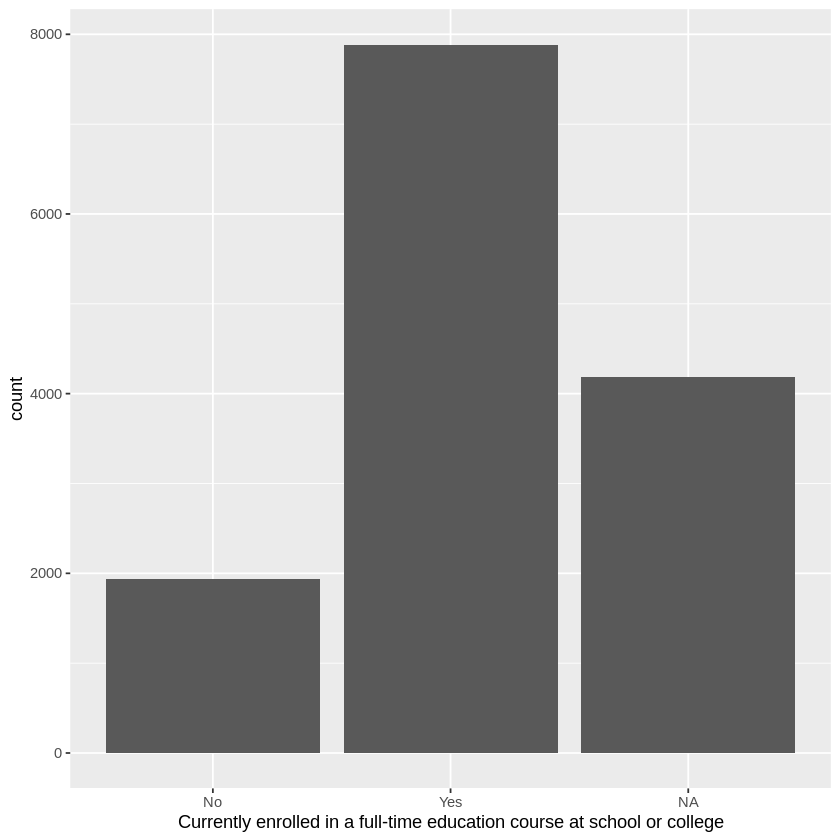

In [13]:
# Bar chart
ggplot(youth_data, aes(full_educ)) +
  geom_bar() +
  xlab('Currently enrolled in a full-time education course at school or college')

For the bar chart, the ggplot2 default is to present the number of cases. You have to include arguments in the *geom_bar* and *scale_y* layers of the graph to get the percentage. 

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


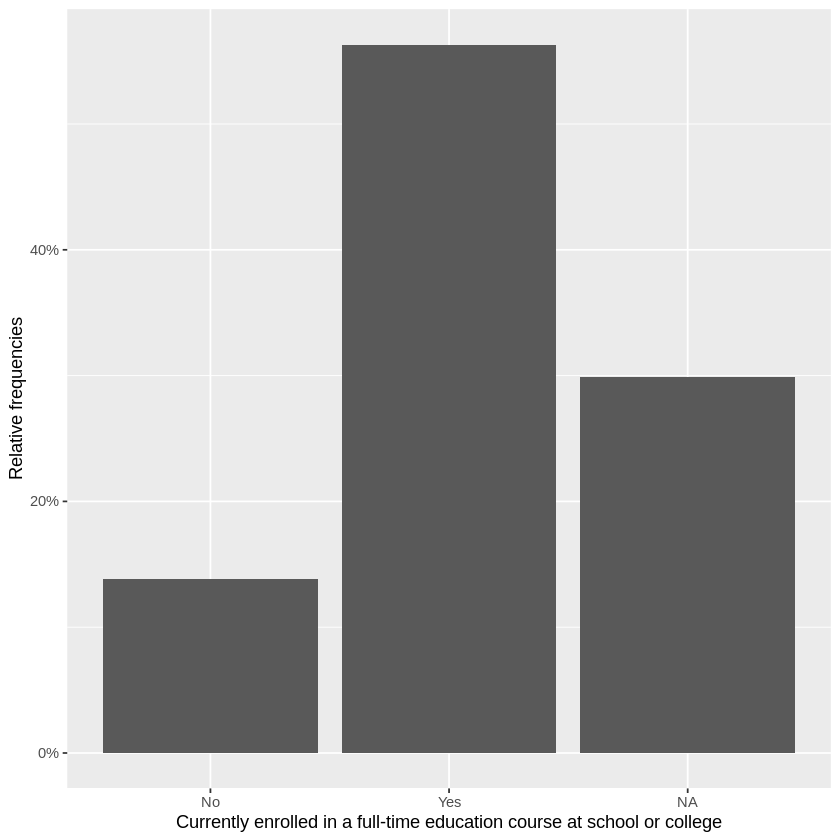

In [14]:
# Proportion bar plot
ggplot(youth_data, aes(full_educ)) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=scales::percent) +
  xlab('Currently enrolled in a full-time education course at school or college') +
  ylab("Relative frequencies")

Now that we explored our dependent variable, we can examine how it is associated with other variables of the dataset.

## Bivariate Analysis

## 1. Full-time education and truancy

### Two-way frequency tables and tables of proportions

We want to know whether the transition to full-time education is associated with participants' school trajectories and socioeconomic backgrounds. First, we can examine whether school truancy in year 11 is associated with transitioning to full-time education.

First, we will just check the variable for truancy. We will first check the class of the variable, transform it into a factor and then check the distribution.

In [15]:
class(youth_data$truancy_y11) # checking the class
youth_data$truancy_y11 <- as.factor(youth_data$truancy_y11) # transforming it to a factor
table(youth_data$truancy_y11, exclude = NULL) # printing the frequency table

[1] "character"


        No truancy       Not answered Occasional truancy Persistant truancy 
              9801                171               3692                339 

'Not answered' is coded as a category, we will create a new variable (*new_truancy*) in which participants who did not answer the question about truancy will be coded as missing data. We will save the new variable in the dataset, for that reason, we assign it to *youth_data$new_truancy*. The arguments between [] are the logical statement and <- indicates the values we are assigning according to the statements. 

In [16]:
youth_data$new_truancy [youth_data$truancy_y11 == "Not answered"] <- NA
youth_data$new_truancy [youth_data$truancy_y11 == "Persistant truancy"] <- 'Persistant truancy'
youth_data$new_truancy [youth_data$truancy_y11 == "Occasional truancy"] <- 'Occasional truancy'
youth_data$new_truancy [youth_data$truancy_y11 == "No truancy"] <- 'No truancy'

Warning message:
“Unknown or uninitialised column: `new_truancy`.”


We can produce a frequency table to look at the association between the transition to full-time education after secondary school and truancy in year 11. In the coding below we are assigning the table to an object named 'table2'.

In [17]:
table2 <- table(youth_data$full_educ, youth_data$new_truancy) # assigning table to object
table2 # print the object

     
      No truancy Occasional truancy Persistant truancy
  No        1050                734                125
  Yes       6164               1611                 49

From the proportion table, we will follow the convention and include the total percentage in the independent variable (truancy). To include the total percentage in the dependent variable(columns), you need to include the argument *margin = 2* in the command below. If you want to see the total percentage in the rows, you just need to change the argument to *margin = 1*.

In [18]:
100*prop.table(table2, margin = 2)

     
      No truancy Occasional truancy Persistant truancy
  No    14.55503           31.30064           71.83908
  Yes   85.44497           68.69936           28.16092

Based on the percentage table, it is evident that a significant proportion of participants who experienced persistent truancy during Year 11 did not transition to full-time education (71.84%). On the other hand, a majority of participants who did not have truancy in Year 11 successfully transitioned to full-time education (85.45%).

Now, we need to test whether the association between the two variables is due to chance or whether it is a statistically significant association. 

### Chi-squared test

The chi-squared test in R is very straightforward. You use the *chisq.test()* command for the frequency table you are comparing the observed and expected frequencies. In our case, we want to know whether there is an association between the transition to full-time education after secondary school and truancy during Year 11. The frequency table for this association is in object ‘table2’ (see coding above). 

In [19]:
chisq.test(table2)


	Pearson's Chi-squared test

data:  table2
X-squared = 621.23, df = 2, p-value < 2.2e-16


Based on the results of the chi-square test ($\chi^{2}$ = 621.23, df = 2, and a p-value < 0.05), we can confidently reject the null hypothesis. This indicates that there is a statistically significant relationship between truancy and enrollment in full-time education after secondary school.

## 2. Full-time education and parental education

### Two-way frequency tables and tables of proportions

We can do a similar analysis to see the association between the transition to full-time education after year 11 and whether one of the parents has a higher education degree.

First, we need to create a new variable that combines both father and mother education, respectively *father_educ* and *mother_educ*.

In [20]:
# creating a new variable 'parents_educ'
youth_data$parents_educ [youth_data$father_educ == "Yes" & youth_data$mother_educ == "Yes" ] <- 2 # both parents with HE
youth_data$parents_educ [youth_data$father_educ == "Yes" & youth_data$mother_educ != "Yes"] <- 1 # one parent with HE
youth_data$parents_educ [youth_data$father_educ != "Yes" & youth_data$mother_educ == "Yes" ] <- 1 # one parent with HE
youth_data$parents_educ [youth_data$father_educ == "No" & youth_data$mother_educ == "No" ] <- 0 # none of parents with HE

# adding the labels to the new variable
youth_data$parents_educ <- factor(youth_data$parents_educ, labels = c("None with HE", "One with HE", "Both with HE"))

# checking the new variable
table(youth_data$parents_educ)

Warning message:
“Unknown or uninitialised column: `parents_educ`.”



None with HE  One with HE Both with HE 
        6219         2667         1494 

We can now run a frequency table and a probability table looking at the association between full-time education and the new variable for parental education.

In [21]:
# frequency table
table3 <- table(youth_data$full_educ, youth_data$parents_educ)
table3 # print the object

     
      None with HE One with HE Both with HE
  No           939         257           61
  Yes         3503        1722         1138

In [22]:
# probability table
100*prop.table(table3, margin = 2)

     
      None with HE One with HE Both with HE
  No     21.139127   12.986357     5.087573
  Yes    78.860873   87.013643    94.912427

Based on the percentage table, it appears that a higher percentage of participants whose parents have attained a higher education degree transitioned to full-time education after school (94.91%), compared to those whose parents did not (78.86%).

### Chi-squared test

Based on the chi-squared test presented below ($\chi^{2}$ = 200.5, df = 2, and a p-value < 0.05), we can reject the null hypothesis and conclude that there is a statistically significant association between the transition to full-time education and parental education.

In [23]:
chisq.test(table3)


	Pearson's Chi-squared test

data:  table3
X-squared = 200.5, df = 2, p-value < 2.2e-16


## 3. Full-time education and GCSE test scores

Now, let's explore the association between GCSE scores and enrollment in full-time education after secondary school. To do this, we can compare the average GCSE scores of individuals who transitioned to full-time education with those who didn't use a t-test.

First, let's take a quick look at the variable for GCSE scores. We will examine this variable in more deep this variable in the next exercise. 

In [24]:
summary(youth_data$total_gcse)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   314.0   404.0   387.8   479.0   857.0 

The variable has a mean of 387.8 and a median of 404.

We can use a boxplot to visualise the relationship between the two variables.

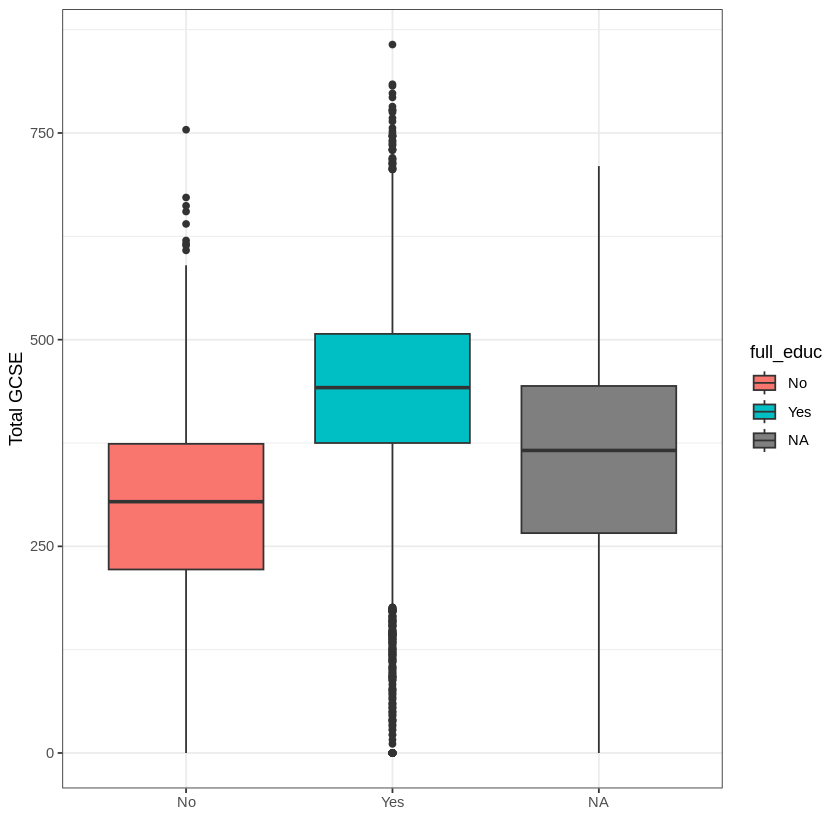

In [25]:
ggplot(youth_data, aes(x=full_educ, y=total_gcse, fill=full_educ)) +
  geom_boxplot(na.rm = T) +
  theme_bw() +
  xlab('') + ylab('Total GCSE')

The boxplot indicates that participants who transitioned to full-time education had a higher score than participants who did not transition. Now, let's perform a t-test to see if the difference in the mean between the two groups is statistically significant.

### T-test 

In [26]:
t.test(youth_data$total_gcse ~ youth_data$full_educ, var.equal = TRUE)


	Two Sample t-test

data:  youth_data$total_gcse by youth_data$full_educ
t = -48.253, df = 9818, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -147.9177 -136.3690
sample estimates:
 mean in group No mean in group Yes 
         290.7032          432.8466 


The t-test indicates that there is a statistically significant difference between the means of the two groups ("transitioned" and "did not transition"), with strong evidence to reject the null hypothesis. Participants who transitioned to full-time education have a significantly higher mean "total_gcse" score compared to participants who did not transition to full-time education after school. The confidence interval provides a range within which we can be 95 per cent confident that the true difference in means lies (between -147.92 and -136.37).


-----------------------------------------------------------------------------------------------------------------------------

This is the end of this exercise.

We hope you are starting to feel more confident about using quantitative methods :)